# Student Marks Prediction

## Description

This project aims to predict the marks obtained by students based on their study time and the number of courses they have opted for. The dataset for this project has been downloaded from the UCI Machine Learning Repository. 

The dataset consists of a small number of instances and attributes, making it both simple and challenging. Despite the limited number of features and samples, the goal is to build a regression model that captures the patterns in the data while ensuring generalizability.

## Properties of the Dataset:

- **Number of Instances**: 100
- **Number of Attributes**: 3 (including the target variable)

## Objective:

1. **Understand the Dataset & Cleanup**: Explore and clean the dataset as necessary.
2. **Build Regression Models**: Develop regression models to predict student marks based on study time and number of courses.
3. **Model Evaluation**: Evaluate the models using appropriate metrics like R-squared (R²), Root Mean Squared Error (RMSE), etc., and compare the results.

## Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/yasserh/student-marks-dataset/data

## Data Dictionary:

- **number_courses**: Numeric data. This is the Number of Courses Opted by the student.
- **time_study**: Numeric data. This is the Average Time Studied per day by the student (in hours).
- **Marks**: Marks obtained by the student (target variable).

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, find the hidden patterns present in the data that will help to predict the marks of student.
2. **Data Cleaning**: Clean the data to remove or impute missing values, outliers present in the data, and remove the unnecessary features if present in the data.

### Load Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")
# Plot
sns.set_style("darkgrid")
# Path
data_path = "../data"
csv_path = os.path.join(data_path, "Student_Marks.csv")

### Load Data and Find General Information(EDA)

In [3]:
# Load Data
df = pd.read_csv(csv_path)

In [4]:
# Get 1st 5 observations of the data to get an idea about the data stored in each feature
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 100
Number of features: 3


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)

FEATURE DESCRIPTION
number_courses      int64
time_study        float64
Marks             float64
dtype: object


### Key Findings

- From feature description it is found that all 3 features are **numeric**.

In [10]:
# Missing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature of the dataset.")

MISSING VALUE DETECTION
No missing value present in any feature of the dataset.


In [11]:
# Duplicate observation detection
print("=" * 60)
print("DUPLICATE OBSERVATION DETECTION")
print("=" * 60)
print(f"Number of duplicate observations: {df.duplicated().sum()}")

DUPLICATE OBSERVATION DETECTION
Number of duplicate observations: 0


### Distribution of Numerical Features

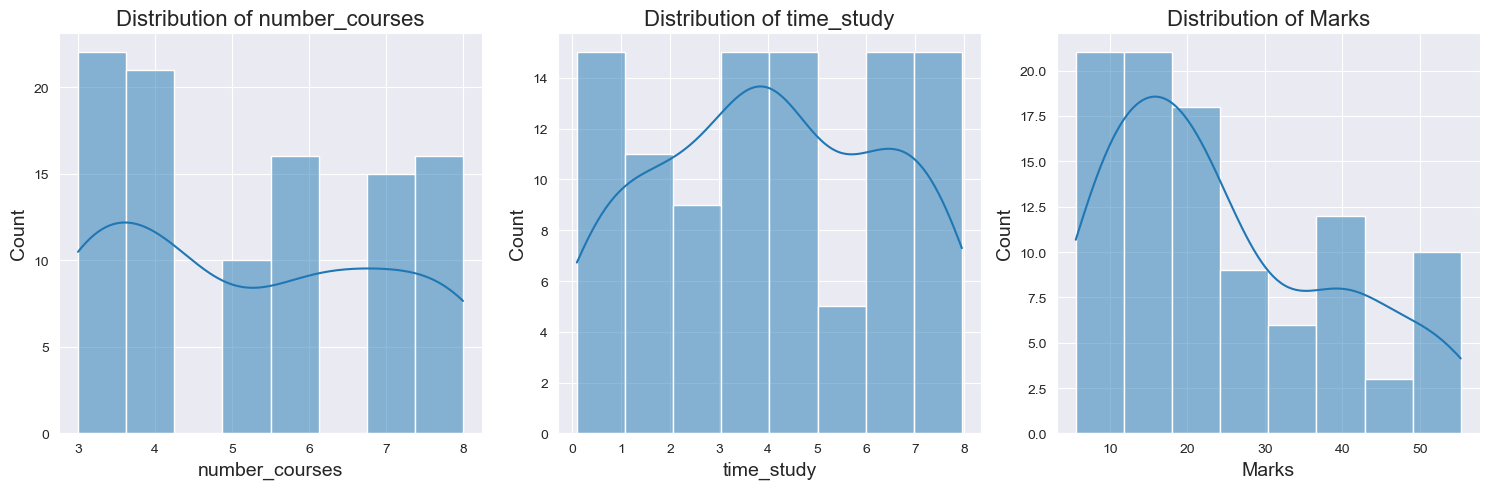

In [14]:
# Visualize the distribution of numerical features using Histogram Analysis
fig, axis = plt.subplots(nrows= 1, ncols= 3, figsize=(15, 5))
axis= axis.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(data= df, x = col, kde= True, ax= axis[i])
    axis[i].set_title(f"Distribution of {col}", fontsize= 16)
    axis[i].set_xlabel(f"{col}", fontsize= 14)
    axis[i].set_ylabel("Count", fontsize= 14)
plt.tight_layout()
plt.show()

### Key Findings

- From Histogram Analysis it is found that none of the features are normally distributed.

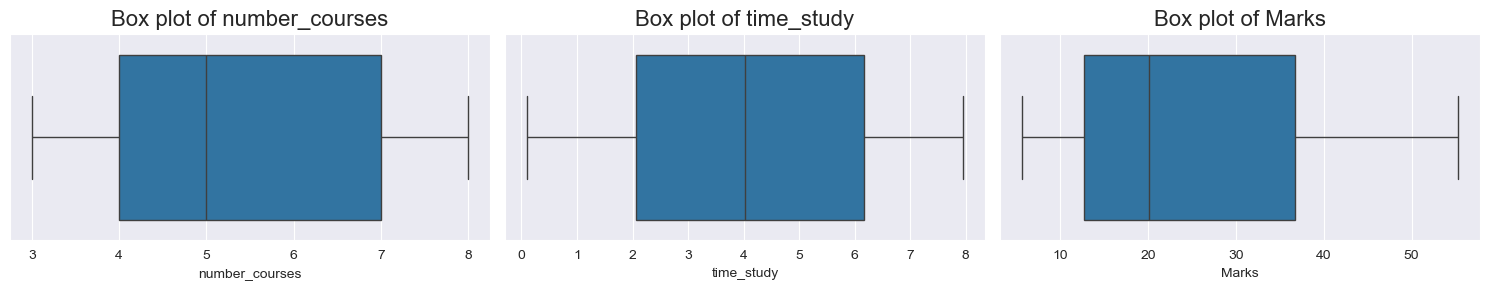

In [18]:
# Outlier Detection with Box Plot Analysis
fig, axis = plt.subplots(nrows= 1, ncols= 3, figsize= (15, 3))
axis = axis.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data= df, x = col, ax= axis[i])
    axis[i].set_title(f"Box plot of {col}", fontsize= 16)
plt.tight_layout()
plt.show()

### Key Findings

- From Boxplot analysis it is found that **no outlier** present in any feature of the observations.

### Correlation Analysis

In [20]:
# Find the linear correlation among the features using Pearson's Correlation Co-efficient
corr = df.corr().round(2)
corr

,number_courses,time_study,Marks
number_courses,1.00,0.20,0.42
time_study,0.20,1.00,0.94
Marks,0.42,0.94,1.00


<Axes: >

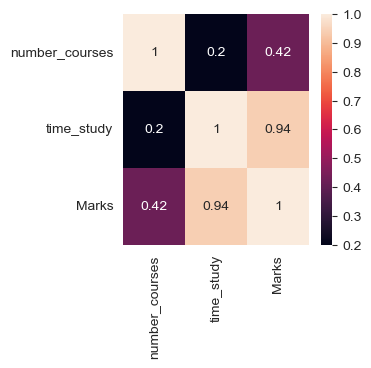

In [21]:
# Visualize the correlation with Heatmap
plt.figure(figsize= (3, 3))
sns.heatmap(corr, annot= True)

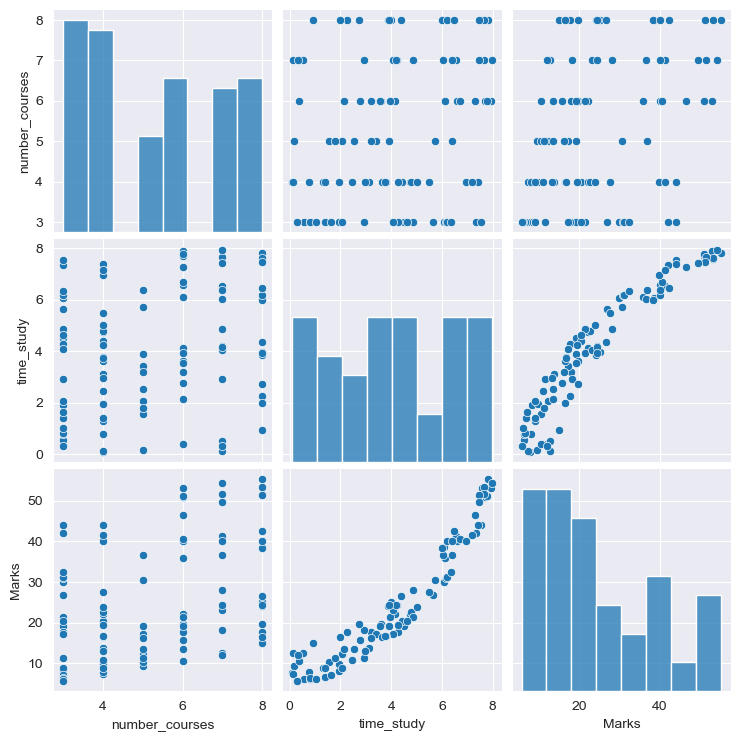

In [22]:
# Draw the Pair plot among the features to visualize the relationship among the features
sns.pairplot(data= df)

### Key Findings

- From Correlation Analysis it is found that **time_study** has a **strong prositive** correlation with the target variable **Marks**. The Pair plot analysis also support that marks increases hours of study increases.
- From Correlation Analysis it is found that **number_courses** has a **moderate prositive** correlation with the target variable **Marks**. From Pair plot analysis it is found that the relationship between them is **non-linear**.